# Regresión Lineal Simple

Este notebook implementa un modelo de regresión lineal simple usando scikit-learn.

## Características:
- Una sola variable explicativa
- Evaluación con MSE, MAE y R²
- Visualización de la recta de regresión
- Análisis de coeficientes e intercepción


In [1]:
# Configuración de la ruta y columnas
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Ruta del CSV
CSV_PATH = Path(r'C:\Users\INMORTAL\OneDrive\Documentos\python\notebooks\modelos\Data\Global_Cybersecurity_Threats_2015-2024.csv')

# Para regresión simple: una columna X y una columna objetivo y
COL_X_SIMPLE = 'Number of Affected Users'    # variable explicativa
COL_Y = 'Financial Loss (in Million $)'      # variable objetivo

# Carga de datos
if not CSV_PATH.exists():
    raise FileNotFoundError(f'No existe el CSV en: {CSV_PATH.resolve()}')

df = pd.read_csv(CSV_PATH)
print('Shape:', df.shape)
print('Columnas:', list(df.columns))
df.head()


Shape: (3000, 10)
Columnas: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [2]:
# Regresión lineal simple
# Selección de X e y
if COL_X_SIMPLE not in df.columns or COL_Y not in df.columns:
    raise ValueError('Revisa COL_X_SIMPLE y COL_Y. No existen en el DataFrame.')

X_simple = df[[COL_X_SIMPLE]].dropna()
y_simple = df.loc[X_simple.index, COL_Y]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Predicción y métricas
y_pred = model_simple.predict(X_test)
print('--- Regresión lineal simple ---')
print('Coeficiente (beta):', model_simple.coef_)
print('Intercepción:', model_simple.intercept_)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))


--- Regresión lineal simple ---
Coeficiente (beta): [-3.73453324e-07]
Intercepción: 50.61300638097053
MSE: 808.9102336252276
MAE: 24.609167373431095
R2 : -0.00034208499642574


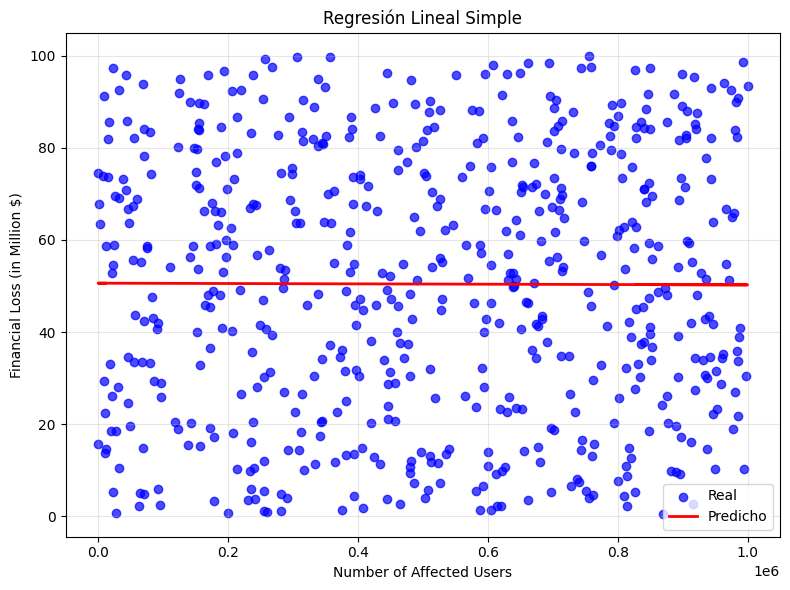

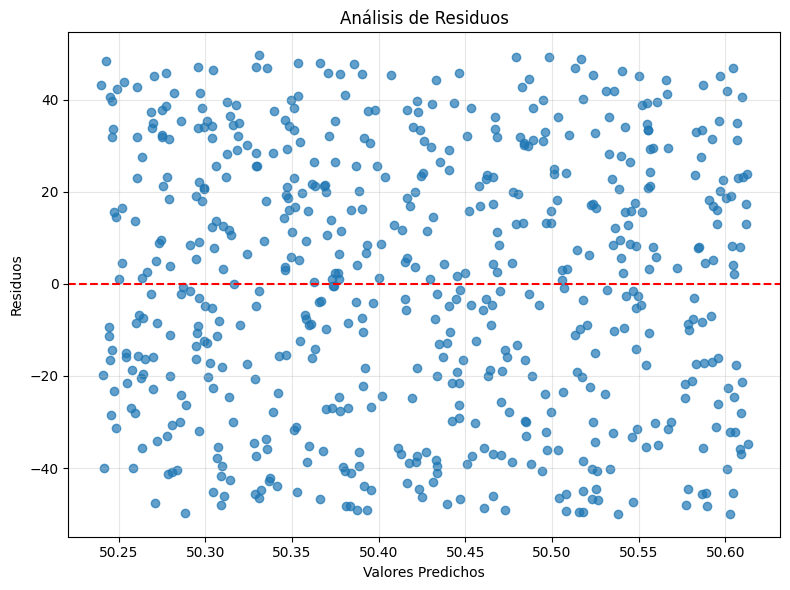

In [3]:
# Gráfico de dispersión y recta ajustada
plt.figure(figsize=(8, 6))
plt.scatter(X_test[COL_X_SIMPLE], y_test, alpha=0.7, label='Real', color='blue')
plt.plot(X_test[COL_X_SIMPLE], y_pred, color='red', label='Predicho', linewidth=2)
plt.xlabel(COL_X_SIMPLE)
plt.ylabel(COL_Y)
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
